<a href="https://colab.research.google.com/github/ThePearsSon/pear-sons/blob/master/pearson.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [93]:
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Dropout
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator, image
from tensorflow.python.keras.utils import to_categorical

import os
import zipfile
from PIL import Image
from io import BytesIO

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [2]:
local_zip = 'images.zip'
zip_ = zipfile.ZipFile(local_zip)
zip_.extractall()
zip_.close()

In [94]:
base_dir = 'images'

train_dir = os.path.join(base_dir, 'train')
train_pears_dir = os.path.join(train_dir, 'pears')
train_sons_dir = os.path.join(train_dir, 'sons')

validation_dir = os.path.join(base_dir, 'validation')
validation_pears_dir = os.path.join(validation_dir, 'pears')
validation_sons_dir = os.path.join(validation_dir, 'sons')

# Data preparation

In [ ]:

images = np.array([np.array(Image.open(image_path + img).convert("RGB")).flatten() for img in os.listdir(image_path)], order='F', dtype='uint8')

In [111]:
def plot_images(item_dir, top=10):
  all_item_dirs = os.listdir(item_dir)
  item_files = [os.path.join(item_dir, file) for file in all_item_dirs][:top]
  
  plt.figure(figsize=(10, 10))
  for idx, img_path in enumerate(item_files):
    plt.subplot(5,5,idx+1)
    img = mpimg.imread(img_path)
    plt.imshow(img)
  plt.tight_layout()

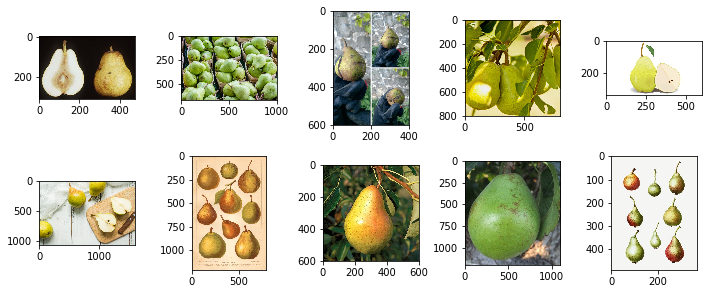

In [112]:
plot_images(train_pears_dir)

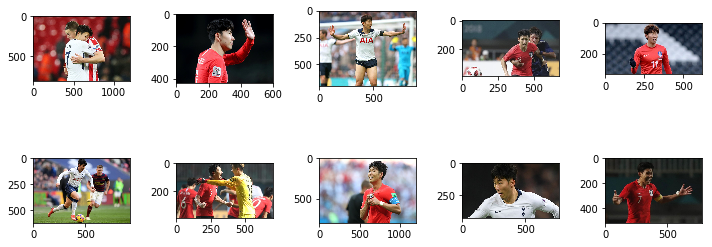

In [113]:
plot_images(train_sons_dir)

In [ ]:


Y_train = np_utils.to_categorical(y_train, num_classes=2)
Y_test = np_utils.to_categorical(y_test, num_classes=2)

In [117]:
input_shape = (200,200, 3)

model = Sequential([
    Conv2D(32, (3, 3), input_shape=input_shape),
    MaxPool2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Conv2D(32, (3, 3), activation='relu'),
    MaxPool2D((2, 2)),
    
    Flatten(),
    
    Dense(32, activation='sigmoid'),
    Dropout(0.4),
    Dense(32, activation='sigmoid'),
    Dropout(0.2),
    Dense(2, activation='sigmoid'),
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 34, 34, 32)        18464     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 17, 17, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 9248)              0         
__________

In [90]:
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1)

In [118]:
train_generator = train_datagen.flow_from_directory(
      train_dir,
      target_size=(200,200),
      batch_size=20,
      class_mode='categorical')

validation_generator = test_datagen.flow_from_directory(
      validation_dir,
      target_size=(200,200),
      batch_size=20,
      class_mode='categorical')


Found 907 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [119]:
history = model.fit_generator(
      train_generator,
      steps_per_epoch=100,
      epochs=10,
      validation_data=validation_generator,
      validation_steps=50,
      verbose=2)

Epoch 1/10
10/10 [==============================] - 6s 580ms/step - loss: 0.4177 - acc: 0.9400
 - 55s - loss: 0.5725 - acc: 0.7607 - val_loss: 0.4177 - val_acc: 0.9400
Epoch 2/10
10/10 [==============================] - 6s 587ms/step - loss: 0.2712 - acc: 0.9500
 - 53s - loss: 0.4314 - acc: 0.8721 - val_loss: 0.2712 - val_acc: 0.9500
Epoch 3/10
10/10 [==============================] - 6s 563ms/step - loss: 0.1570 - acc: 0.9800
 - 52s - loss: 0.2746 - acc: 0.9283 - val_loss: 0.1570 - val_acc: 0.9800
Epoch 4/10
10/10 [==============================] - 6s 554ms/step - loss: 0.1192 - acc: 0.9750
 - 52s - loss: 0.2158 - acc: 0.9438 - val_loss: 0.1192 - val_acc: 0.9750
Epoch 5/10
10/10 [==============================] - 6s 577ms/step - loss: 0.1285 - acc: 0.9650
 - 54s - loss: 0.2082 - acc: 0.9383 - val_loss: 0.1285 - val_acc: 0.9650
Epoch 6/10
10/10 [==============================] - 5s 539ms/step - loss: 0.1059 - acc: 0.9700
 - 52s - loss: 0.1961 - acc: 0.9449 - val_loss: 0.1059 - val_acc:

In [139]:
for img_name in os.listdir(validation_pears_dir)[:]:
    img_path = os.path.join(validation_pears_dir, img_name)
    img = Image.open(img_path)
    img = img.resize( (200,200) )
    X = image.img_to_array(img) # funkcja z kerasa, zamieniająca obiekty klasy PIL.Image na np.array  
    X = np.expand_dims(X, axis=0)
    if X.shape[3] !=3:
        print(img_path, X.shape)
    else:
        y_pred = model.predict(X, verbose=0)
        print(img_path, y_pred)


images\validation\pears\00000000.jpg [[0.5683713  0.01133629]]
images\validation\pears\00000002.jpg [[0.5876905 0.0098027]]
images\validation\pears\00000004.jpg [[0.564819   0.01160165]]
images\validation\pears\00000005.jpg [[0.05572834 0.1738198 ]]
images\validation\pears\00000007.jpg [[0.6122878  0.00911855]]
images\validation\pears\00000008.jpg [[0.6122878  0.00911855]]
images\validation\pears\00000009.jpg [[0.6122878  0.00911855]]
images\validation\pears\00000010.jpg [[0.6122878  0.00911855]]
images\validation\pears\00000011.jpg [[0.6122878  0.00911855]]
images\validation\pears\00000012.jpg [[0.6122878  0.00911855]]
images\validation\pears\00000013.jpg [[0.6122878  0.00911855]]
images\validation\pears\00000014.jpg [[0.6122878  0.00911855]]
images\validation\pears\00000015.jpg [[0.6122878  0.00911855]]
images\validation\pears\00000016.jpg [[0.6122878  0.00911855]]
images\validation\pears\00000017.jpg [[0.5965408  0.01046095]]
images\validation\pears\00000018.jpg [[0.6122878  0.00911